## Importing the libraries

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from pandas_profiling import ProfileReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

## Loading the dataset

In [19]:
df = pd.read_csv('diabetes2.csv')

In [20]:
df.head()

Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2             0       1         1          1   28       0       0   
3             0       1         0          1   27       0       0   
4             0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                     0             0       0        1                  0   
1                     0             1       0        0                  0   
2                     0             0       1        0                  0   
3                     0             1       1        1                  0   
4                     0             1       1        1                  0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  
0              1            0        5        18        15         1    0    9  
1              0            1        3         0         0         0    0    7  
2              1            1        5        30        30         1    0    9  
3              1            0        2         0         0         0    0   11  
4              1            0        2         3         0         0    0   11

## Exploratory data analysis

In [21]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
df.shape

(253680, 20)

In [23]:
# returns the name of all columns
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')

In [24]:
# checking the number of missing values in the daataset
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

In [25]:
# Handling missing values 
# removing the rows having missing values
df.dropna(inplace = True)

In [26]:
# Checking duplicates

duplicate = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate

Duplicate Rows :  59165


Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
1242               2       1         1          1   27       1       0   
1528               0       0         1          1   23       0       0   
1563               0       0         0          1   21       1       0   
1619               0       0         0          1   27       0       0   
1768               0       0         0          1   26       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253655             0       0         0          1   28       0       0   
253656             0       0         0          1   25       0       0   
253672             0       1         0          1   30       1       0   
253674             0       0         0          1   27       0       0   
253677             0       0         0          1   28       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
1242                       0             0       0        1   
1528                       0             1       1        1   
1563                       0             1       1        1   
1619                       0             1       0        1   
1768                       0             1       1        1   
...                      ...           ...     ...      ...   
253655                     0             1       1        1   
253656                     0             1       1        1   
253672                     1             1       1        1   
253674                     0             0       0        1   
253677                     0             1       1        0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
1242                    0              1            0        5         0   
1528                    0              1            0        1         0   
1563                    0              1            0        1         0   
1619                    0              1            0        2         0   
1768                    0              1            0        1         0   
...                   ...            ...          ...      ...       ...   
253655                  0              1            0        2         0   
253656                  1              1            0        1         0   
253672                  0              1            0        3         0   
253674                  0              1            0        1         0   
253677                  0              1            0        1         0   

        PhysHlth  DiffWalk  Sex  Age  
1242          30         1    0   10  
1528           0         0    0   11  
1563           0         0    0    4  
1619           0         0    0   10  
1768           0         0    0    7  
...          ...       ...  ...  ...  
253655         0         0    0    2  
253656         0         0    0    4  
253672         0         0    1   12  
253674         0         0    0    3  
253677         0         0    0    2  

[59165 rows x 20 columns]

In [27]:
# Removing duplicate rows from the dataset
df.drop_duplicates(inplace = True)

In [28]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ", len(duplicate))

Duplicate Rows :  0


### Over Sampling

In [29]:
# in our dataset the label is diabetes column

# This will return the label distribution count 
df['Diabetes_012'].value_counts()

0    156375
2     33566
1      4574
Name: Diabetes_012, dtype: int64

<AxesSubplot:title={'center':'Label Distribution'}>

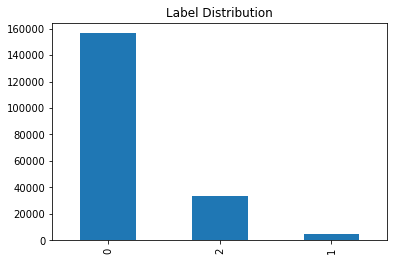

In [30]:
# plotting the label distribution
df['Diabetes_012'].value_counts().plot(kind = 'bar', title = 'Label Distribution')

As you can see the dataset is imbalanced, we need to balance it in order to get a better model.

<AxesSubplot:title={'center':'Label Distribution after Oversampling'}>

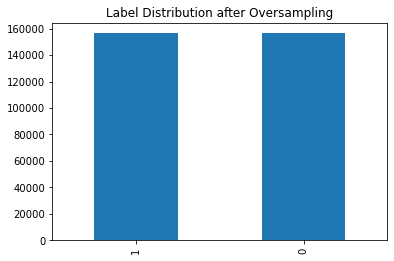

In [31]:
# over sampling of the dataset to get a balanced dataset
class_0 = df[df['Diabetes_012'] == 0]
class_1 = df[df['Diabetes_012'] == 1]

# over sampling of the minority class 1
class_1_over = class_1.sample(len(class_0), replace=True)

# Creating a new dataframe with over sampled class 1 df and class 0 df
df_new = pd.concat([class_1_over, class_0], axis=0)

# plotting the new label distribution
df_new['Diabetes_012'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

## Splitting dataset to train and test

In [32]:
X = df_new.drop('Diabetes_012', axis = 1) # features
y = df_new[['Diabetes_012']] # labels

# splitting the features and labels into train and test with test size = 20% and train size = 80%
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10)

## Fitting machine learning models

#### 1. Random Forest Classifier

In [33]:
# Initializing the model
model_1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',
                             min_samples_split=10, random_state=0)

# fitting the model on the train data
model_1.fit(X_train, y_train)

# predicting values on test data
predictions = model_1.predict(X_test)

In [34]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

True values  Predicted values
127826            1                 1
218314            0                 0
53116             0                 0
45710             0                 0
179254            1                 1
...             ...               ...
28948             0                 0
191019            0                 0
135102            1                 1
137970            0                 0
50816             0                 0

[62550 rows x 2 columns]

In [35]:
# Evaluation

# calculating the accuracy of the model
accuracies = {}
accuracy_1 = accuracy_score(y_test, predictions)
accuracies['Random Forest Classifier'] = accuracy_1

# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy_1*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Random Forest Classifier : 99.42

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     31305
           1       0.99      1.00      0.99     31245

    accuracy                           0.99     62550
   macro avg       0.99      0.99      0.99     62550
weighted avg       0.99      0.99      0.99     62550


**************************************************

Mean squared error : 0.0057873701039168664

**************************************************

Root mean squared error : 0.07607476653869447


Confusion Matrix for Random Forest Classifier


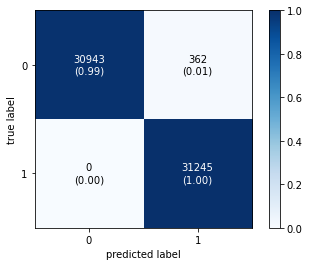

In [36]:
print('Confusion Matrix for Random Forest Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [37]:
## 2. Logistic Regression

# Initializing the model
model_2 = LogisticRegression()

# fitting the model on the train data
model_2.fit(X_train, y_train)

# predicting values on test data
predictions = model_2.predict(X_test)

In [38]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

True values  Predicted values
127826            1                 1
218314            0                 1
53116             0                 1
45710             0                 1
179254            1                 1
...             ...               ...
28948             0                 0
191019            0                 1
135102            1                 1
137970            0                 0
50816             0                 0

[62550 rows x 2 columns]

In [39]:
# Evaluation

# calculating the accuracy of the model
accuracy_2 = accuracy_score(y_test, predictions)
accuracies['Logistic Regression'] = accuracy_2
# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Logistic Regression : ' + str(round(accuracy_2*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Logistic Regression : 65.75

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.67      0.62      0.64     31305
           1       0.65      0.70      0.67     31245

    accuracy                           0.66     62550
   macro avg       0.66      0.66      0.66     62550
weighted avg       0.66      0.66      0.66     62550


**************************************************

Mean squared error : 0.3425259792166267

**************************************************

Root mean squared error : 0.5852571906577712


Confusion Matrix for Logistic Regression


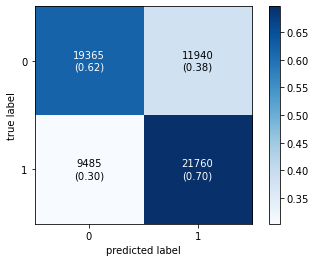

In [40]:
print('Confusion Matrix for Logistic Regression')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [41]:
## 3. Decision Tree Classifier

# Initializing the model

model_3 = DecisionTreeClassifier(max_depth = 3)

# fitting the model on the train data
model_3.fit(X_train, y_train)

# predicting values on test data
predictions = model_3.predict(X_test)

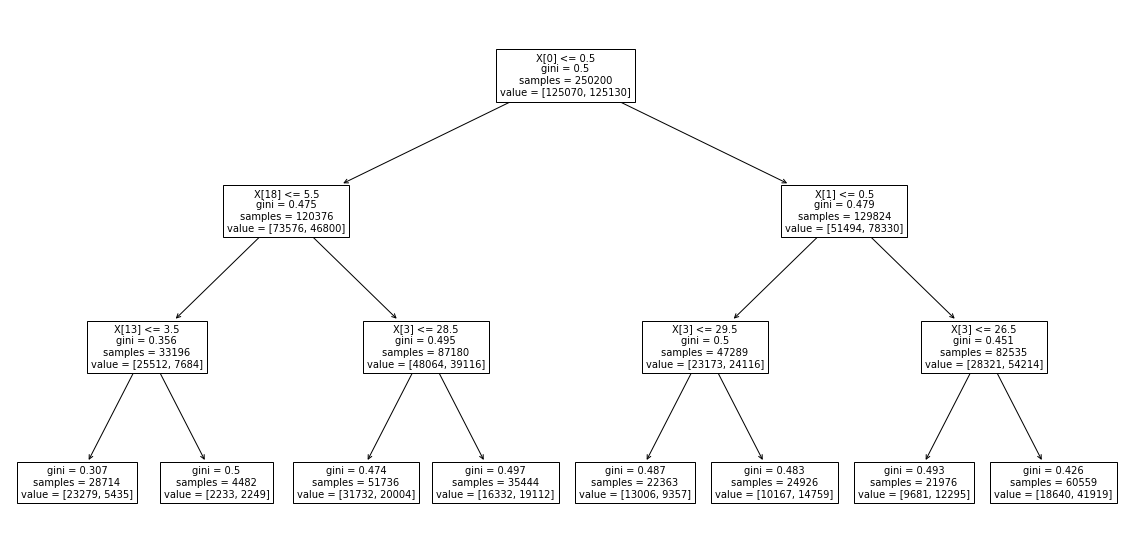

In [42]:
# plotting decision tree classifier
plt.figure(figsize = (20,10))
tree.plot_tree(model_3)
plt.show()

In [43]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

True values  Predicted values
127826            1                 1
218314            0                 1
53116             0                 1
45710             0                 1
179254            1                 0
...             ...               ...
28948             0                 0
191019            0                 1
135102            1                 1
137970            0                 0
50816             0                 0

[62550 rows x 2 columns]

In [44]:
# Evaluation

# calculating the accuracy of the model
accuracy_3 = accuracy_score(y_test, predictions)
accuracies['Decision Tree Classifier'] = accuracy_3

# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Decision Tree Classifier : ' + str(round(accuracy_3*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Decision Tree Classifier : 63.15

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.66      0.55      0.60     31305
           1       0.61      0.72      0.66     31245

    accuracy                           0.63     62550
   macro avg       0.64      0.63      0.63     62550
weighted avg       0.64      0.63      0.63     62550


**************************************************

Mean squared error : 0.3684572342126299

**************************************************

Root mean squared error : 0.6070067826743206


Confusion Matrix for Decision Tree Classifier


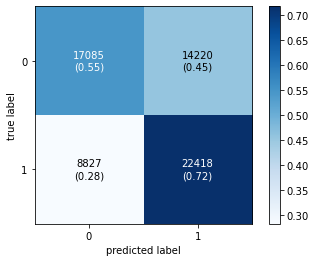

In [45]:
print('Confusion Matrix for Decision Tree Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [46]:
## 4. K – Nearest Neighbor (KNN)

# Initializing the model

model_4 = KNeighborsClassifier(n_neighbors = 5, p = 2)

# fitting the model on the train data
model_4.fit(X_train, y_train)

# predicting values on test data
predictions = model_4.predict(X_test)

In [47]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

True values  Predicted values
127826            1                 1
218314            0                 0
53116             0                 1
45710             0                 0
179254            1                 1
...             ...               ...
28948             0                 0
191019            0                 0
135102            1                 1
137970            0                 0
50816             0                 0

[62550 rows x 2 columns]

In [48]:
# Evaluation

# calculating the accuracy of the model
accuracy_4 = accuracy_score(y_test, predictions)
accuracies['KNeighborsClassifier'] = accuracy_4

# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of K - Nearest Neighbors : ' + str(round(accuracy_4*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of K - Nearest Neighbors : 91.36

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     31305
           1       0.85      1.00      0.92     31245

    accuracy                           0.91     62550
   macro avg       0.93      0.91      0.91     62550
weighted avg       0.93      0.91      0.91     62550


**************************************************

Mean squared error : 0.08636290967226219

**************************************************

Root mean squared error : 0.2938756704326886


Confusion Matrix for K - Nearest Neighbors


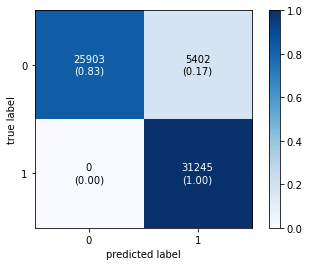

In [49]:
print('Confusion Matrix for K - Nearest Neighbors')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

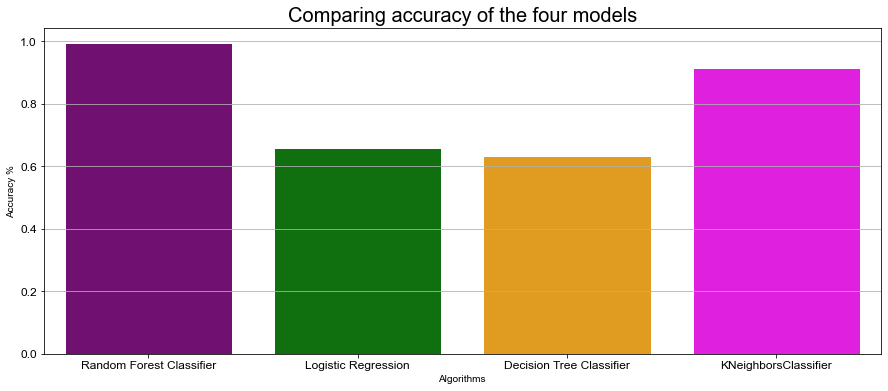

In [51]:
colors = ["purple", "green", "orange", "magenta"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of the four models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()

In [52]:
df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_accuracy.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_accuracy

Model  Accuracy
0  Random Forest Classifier  0.994213
3      KNeighborsClassifier  0.913637
1       Logistic Regression  0.657474
2  Decision Tree Classifier  0.631543

## Summary


Used oversampling method for imbalanced classification data.
Random Forest Classifier models performs best fit for our dataset.
Random Forest Classifer has the lowest Mean squared error : 0.0057 and Root mean squared error : 0.07